# Sample Lya posterior as a function of nuisance parameters

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import cProfile
import emcee
import corner
# our own modules
import mf_emulator
import data_MPGADGET
import simplest_emulator
import linear_emulator
import gp_emulator
import data_PD2013
import mean_flux_model
import thermal_model
import pressure_model
import lya_theory
import likelihood
import emcee_sampler

### Setup Lya likelihood function

In [2]:
# read P1D measurement
#data=data_PD2013.P1D_PD2013(blind_data=True,zmin=2.1,zmax=4.7)
data=data_MPGADGET.P1D_MPGADGET(filename="1024_L90_mimic.json",z_list=[2.0,3.0,4.0])
zs=data.z

In [3]:
#basedir='../../p1d_emulator/sim_suites/emulator_512_18062019/'
#basedir='../../p1d_emulator/sim_suites/emulator_512_17052019/'
basedir='../../p1d_emulator/sim_suites/emulator_256_15072019/'
kmax_Mpc=4.0
p1d_label=None
skewers_label='Ns256_wM0.05'
undersample_z=1
max_arxiv_size=2000
paramList=["Delta2_p","n_p","mF","sigT_Mpc","gamma","kF_Mpc"]
emu_type='mf'
if emu_type=='polyfit':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,emu_type=emu_type,
                                kmax_Mpc=kmax_Mpc,verbose=False,paramList=paramList,train=True)
elif emu_type=='k_bin':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                               undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                               verbose=False,paramList=paramList,train=True,emu_type=emu_type)
elif emu_type=='linear':
    # specify parameters to emulate
    emulate_slope=False
    emulate_growth=False
    emulate_running=False
    emulate_pressure=True
    emu=linear_emulator.LinearEmulator(basedir,p1d_label,skewers_label,kmax_Mpc=kmax_Mpc,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                emulate_slope=emulate_slope,emulate_running=emulate_running,
                                emulate_pressure=emulate_pressure,emulate_growth=emulate_growth,verbose=False)
elif emu_type=='NGP':
    emu=simplest_emulator.SimplestEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                verbose=False)
elif emu_type=='mf':
    emu=mf_emulator.MeanFluxEmulator(basedir,p1d_label,skewers_label,
                                kmax_Mpc=kmax_Mpc,emu_type='k_bin',
                                max_arxiv_size=None,
                                verbose=True,paramList=paramList,train=True)
else:
    raise ValueError('wrong emulator type '+emu_type)

0 0.05 0.0 <mf< 0.15000000000000002
1 0.15 0.04999999999999999 <mf< 0.25
2 0.25 0.15 <mf< 0.35
3 0.35 0.24999999999999997 <mf< 0.44999999999999996
4 0.44999999999999996 0.35 <mf< 0.5499999999999999
5 0.5499999999999999 0.44999999999999996 <mf< 0.6499999999999999
6 0.65 0.55 <mf< 0.75
7 0.75 0.65 <mf< 0.85
8 0.85 0.75 <mf< 0.95
9 0.95 0.85 <mf< 1.0
latin hyper-cube data {'param_space': {'Delta2_star': {'ip': 0, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 1, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'heat_amp': {'ip': 2, 'min_val': 0.3, 'max_val': 3.0, 'latex': '$H_A$'}, 'heat_slo': {'ip': 3, 'min_val': -1.5, 'max_val': 1.5, 'latex': '$H_S$'}, 'z_rei': {'ip': 4, 'min_val': 5.5, 'max_val': 16.0, 'latex': '$z_r$'}}, 'nsamples': 50, 'samples': {'0': [0.392, -2.319, 2.757, -0.4500000000000002, 11.905000000000001], '1': [0.268, -2.327, 1.0830000000000002, -1.41, 6.025], '2': [0

 /Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


6750 initial entries
use 353/6750 entries
build emulator 1/10, <F>=0.150
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 353 points
Optimised
6750 initial entries
use 859/6750 entries
build emulator 2/10, <F>=0.250
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 859 points
Optimised
6750 initial entries
use 1221/6750 entries
build emulator 3/10, <F>=0.350
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 1221 points
Optimised
6750 initial entries
use 1409/6750 entries
build emulator 4/10, <F>=0.450
Loading emulator using a specific arxiv, not the one set in basedi

In [4]:
#theory=lya_theory.LyaTheory(zs,emulator=emu)
theory=lya_theory.get_mock_theory(zs,emulator=emu,alternative_pressure=True)

Note: redshifts have been re-sorted (earliest first)


In [5]:
# specify free parameters in likelihood
#free_parameters=['ln_kF_0']
#free_parameters=['ln_tau_0','ln_tau_1']
#free_parameters=['ln_tau_0','ln_tau_1','ln_gamma_0','ln_kF_0']
free_parameters=['ln_tau_0','ln_tau_1','ln_gamma_0','ln_kF_0','T0_1','T0_2','T0_3']
min_kp_kms=0.003
prior_Gauss_rms=0.02
# ignore emulator covariance for now
ignore_emu_cov=True
like=likelihood.Likelihood(data=data,theory=theory,free_parameters=free_parameters,
                           min_kp_kms=min_kp_kms,ignore_emu_cov=ignore_emu_cov,
                           prior_Gauss_rms=prior_Gauss_rms,verbose=True)

likelihood setup with 7 free parameters
7 free parameters


In [6]:
for p in like.free_params:
    print(p.name,p.value,p.min_value,p.max_value)

ln_tau_0 -1.03436530241446 -1.5 -0.5
ln_tau_1 3.6744666006830182 2.5 3.8
T0_1 0.13626544653787526 0 1
T0_2 9.546039892898634 7 11
T0_3 -1.2041429220366868 -1.5 -0.5
ln_gamma_0 0.3295042060454974 0.09531017980432493 0.6931471805599453
ln_kF_0 -1.3862943611198906 -2.995732273553991 -0.6931471805599453


In [7]:
Np=len(like.free_params)
sampler = emcee_sampler.EmceeSampler(like=like,verbose=True,nwalkers=2*Np+6)

use input likelihood
setup with 20 walkers
set 20 walkers with 7 dimensions
done setting up sampler


### Run burn-in chains

In [8]:
sampler.like.go_silent()

In [9]:
sampler.run_burn_in(nsteps=400+100*Np)

start burn-in, will do 1100 steps
0 [0.45598589 0.90421946 0.14171181 0.63170956 0.29125885 0.38368042
 0.69355609]
20 [0.45073589 0.90081283 0.14452046 0.61203649 0.29363193 0.37560361
 0.67166207]
40 [0.44487277 0.89888813 0.14205851 0.60708091 0.29495902 0.38714081
 0.66801048]
60 [0.44619863 0.89503635 0.13846925 0.60473486 0.29621969 0.40188231
 0.66497185]
80 [0.44326876 0.89888613 0.14133151 0.60734618 0.29696959 0.39947859
 0.66576405]
100 [0.44306773 0.89646502 0.14466204 0.60707297 0.30112499 0.39291219
 0.6663888 ]
120 [0.44421965 0.89168537 0.14314788 0.60497659 0.29431097 0.4024375
 0.66635197]
140 [0.44286407 0.88720149 0.14833936 0.60624357 0.29539176 0.39480741
 0.66686409]
160 [0.44548057 0.89017733 0.14878132 0.60398568 0.29284782 0.40145239
 0.6670923 ]
180 [0.44262655 0.889288   0.14836424 0.61054535 0.30094793 0.40075092
 0.66630799]
200 [0.44096033 0.89160278 0.1453493  0.6106662  0.29533098 0.40255984
 0.66569243]
220 [0.44016435 0.88758265 0.14397127 0.61439727 

### Run main chains

In [10]:
sampler.run_chains(nsteps=1000+300*Np)

0 [0.43870833 0.89673279 0.13462826 0.61495121 0.30177571 0.39429733
 0.66581446]
20 [0.43664779 0.8942607  0.13186074 0.61233784 0.28890479 0.39659165
 0.66759002]
40 [0.43650078 0.8925724  0.13594802 0.61344738 0.29418029 0.39721455
 0.66603207]
60 [0.43841291 0.88856181 0.13701277 0.61083069 0.29187438 0.39630113
 0.66574972]
80 [0.44041896 0.89199423 0.13898266 0.61075303 0.29194796 0.39002558
 0.66605915]
100 [0.44215292 0.88869774 0.14106349 0.60908864 0.29636955 0.39287681
 0.66593484]
120 [0.44004946 0.88650792 0.13366931 0.61229531 0.29840213 0.39072325
 0.66533088]
140 [0.43940574 0.8902596  0.13553979 0.61129266 0.29514996 0.39377951
 0.66539593]
160 [0.43854175 0.89077827 0.13538465 0.61250683 0.29646146 0.39194673
 0.66582286]
180 [0.44077863 0.89074811 0.13792711 0.61442678 0.28936027 0.39017206
 0.6658404 ]
200 [0.44507864 0.88278862 0.1368579  0.60983447 0.29088337 0.40027611
 0.66503488]
220 [0.44206976 0.88619078 0.14071221 0.61270927 0.29359251 0.39727805
 0.66496028

In [11]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.sampler.acceptance_fraction)))

Mean acceptance fraction: 0.488


### Plot results in cube units (0 < x < 1)

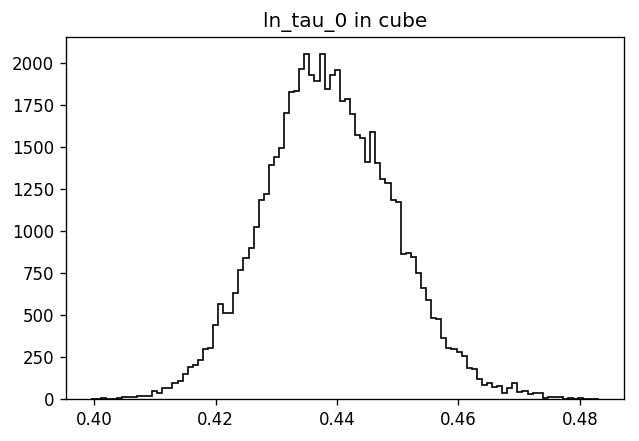

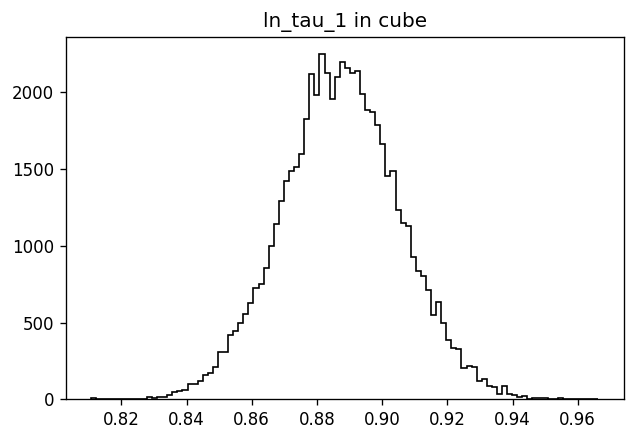

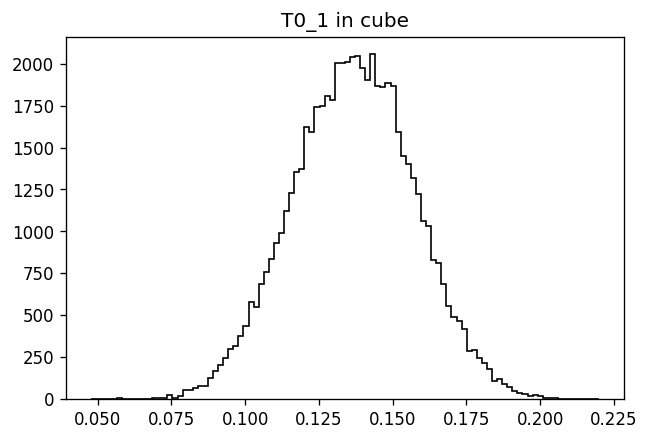

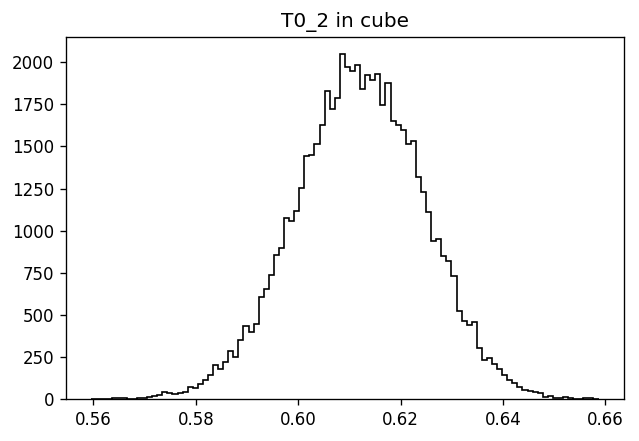

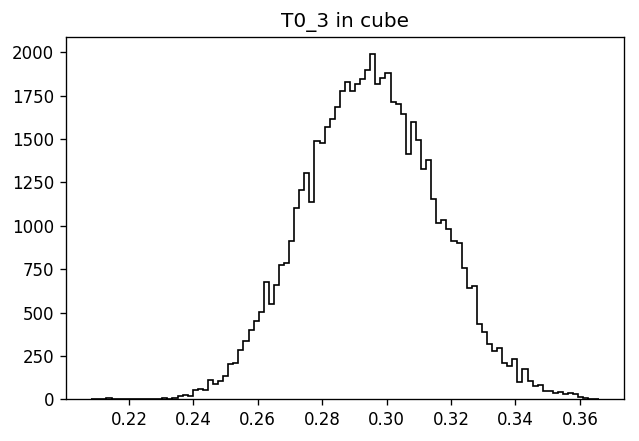

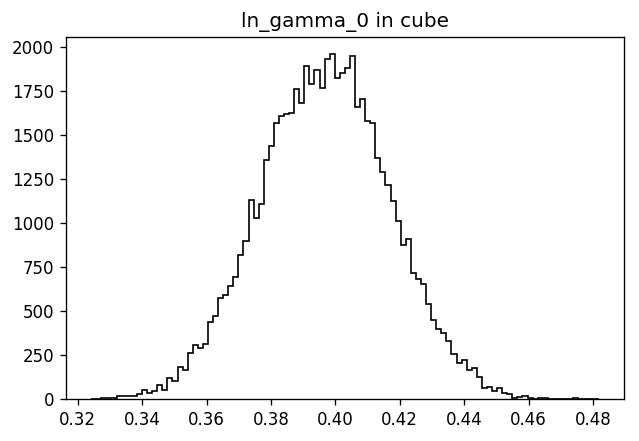

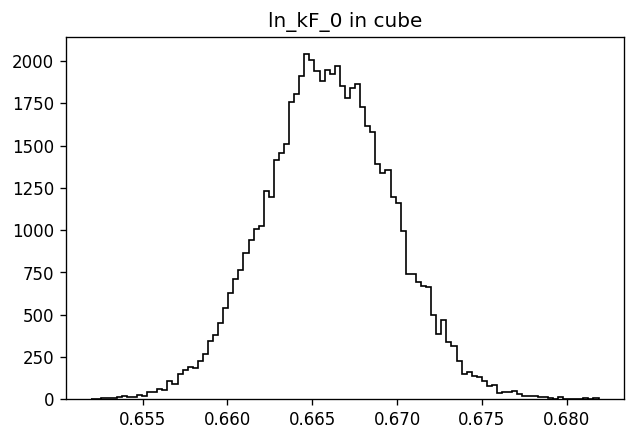

In [12]:
sampler.plot_histograms(cube=True)

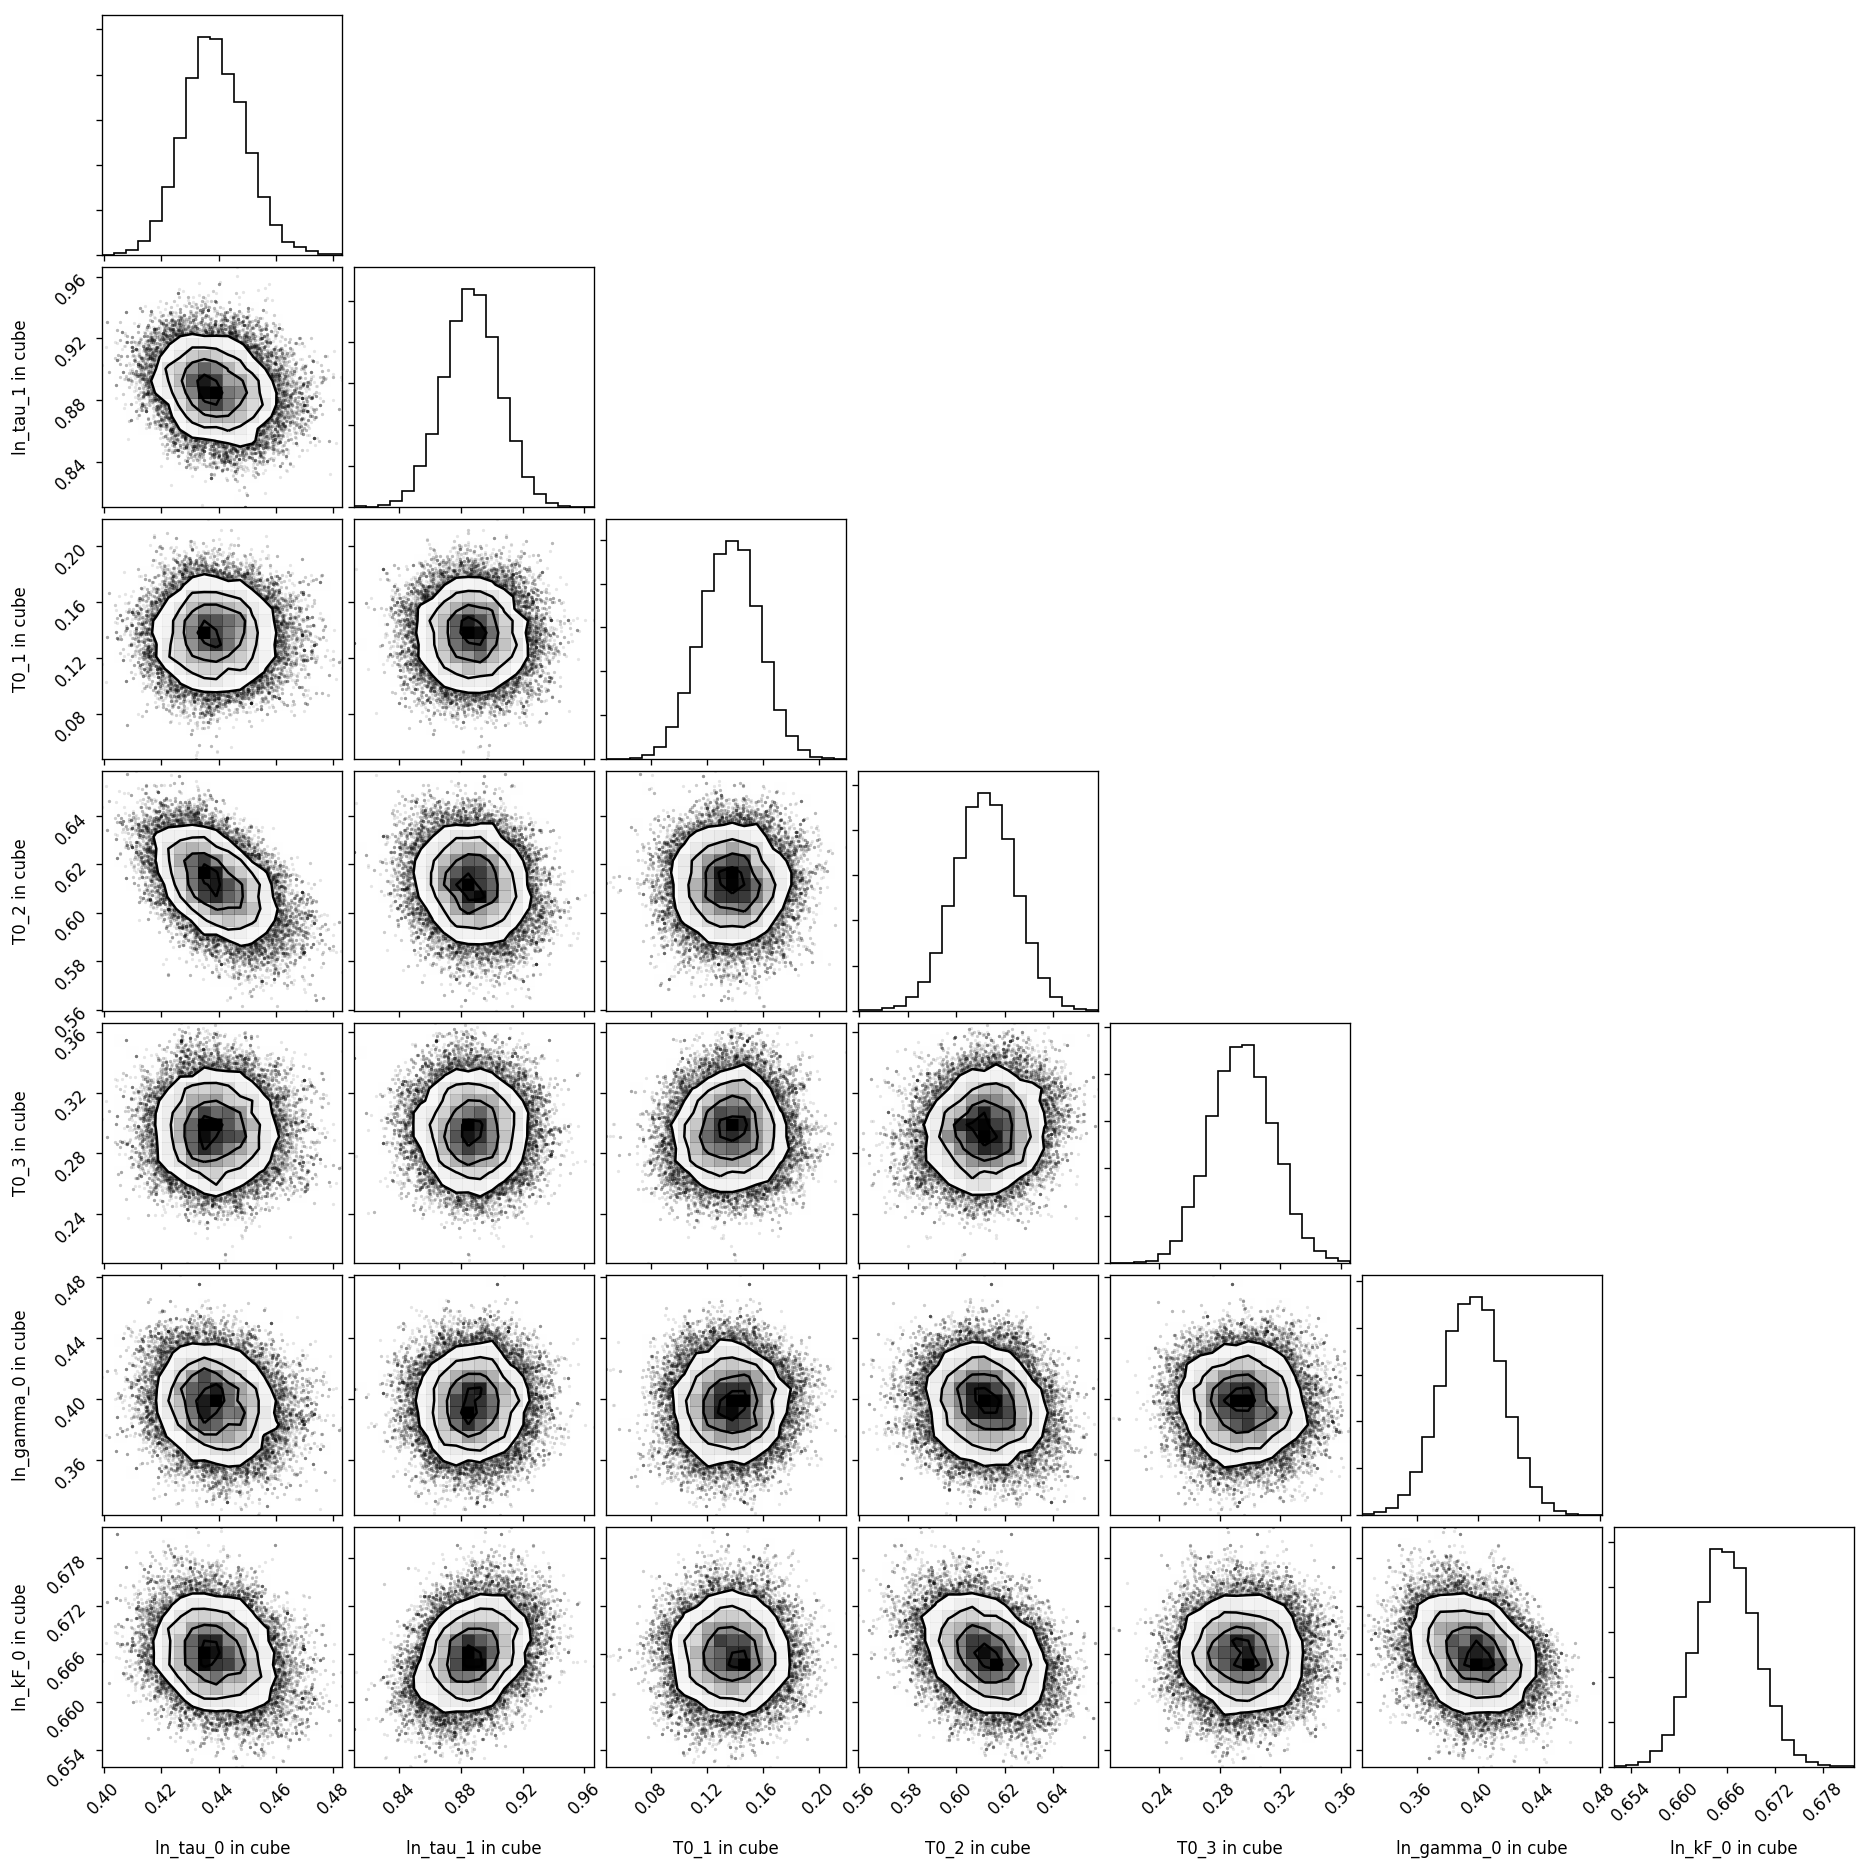

In [13]:
sampler.plot_corner(cube=True)

### Plot results for dimensional parameters

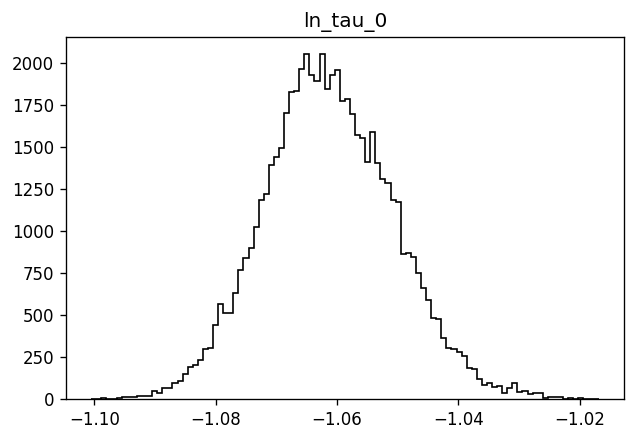

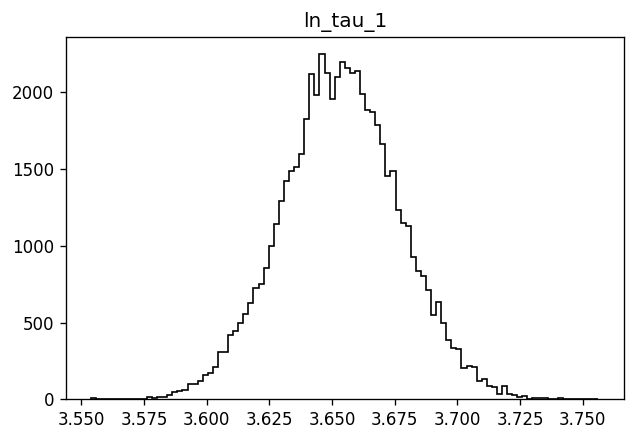

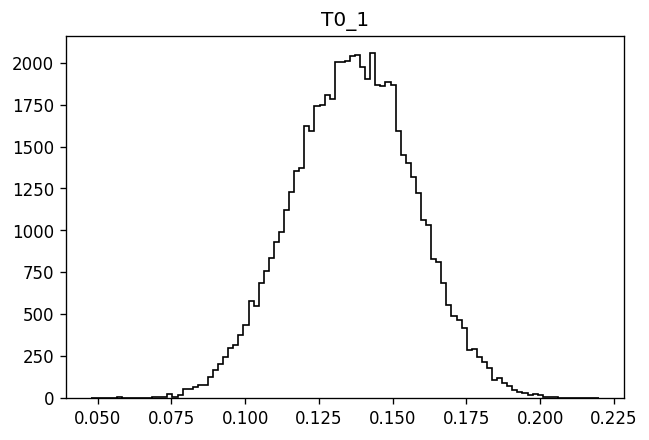

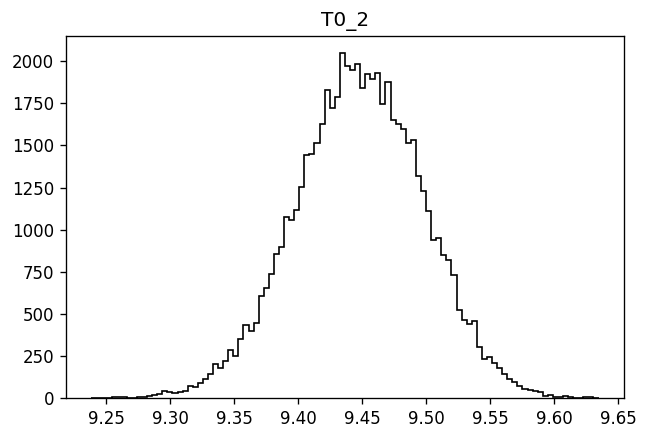

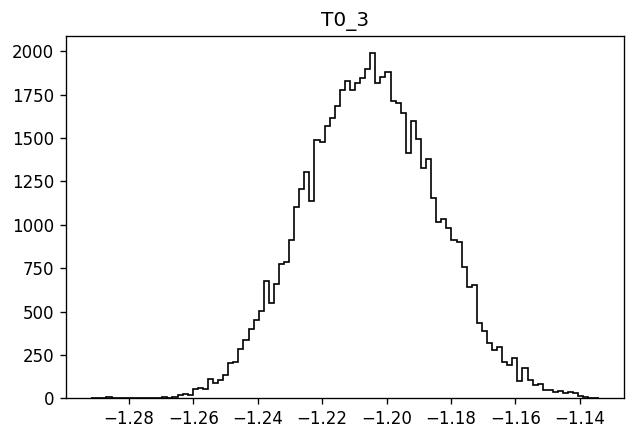

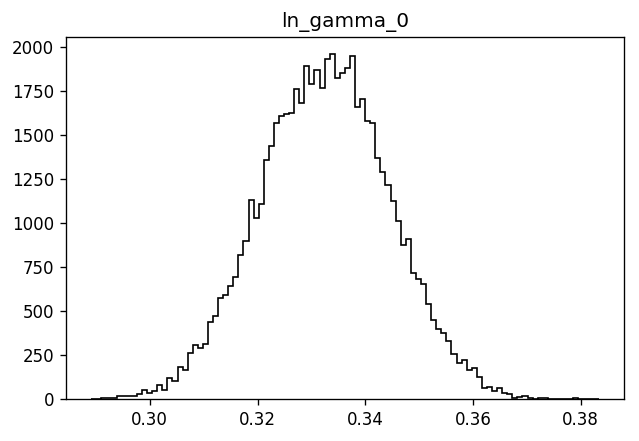

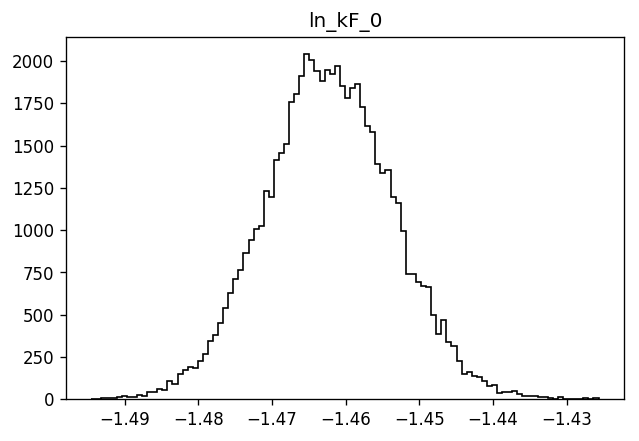

In [14]:
sampler.plot_histograms(cube=False)

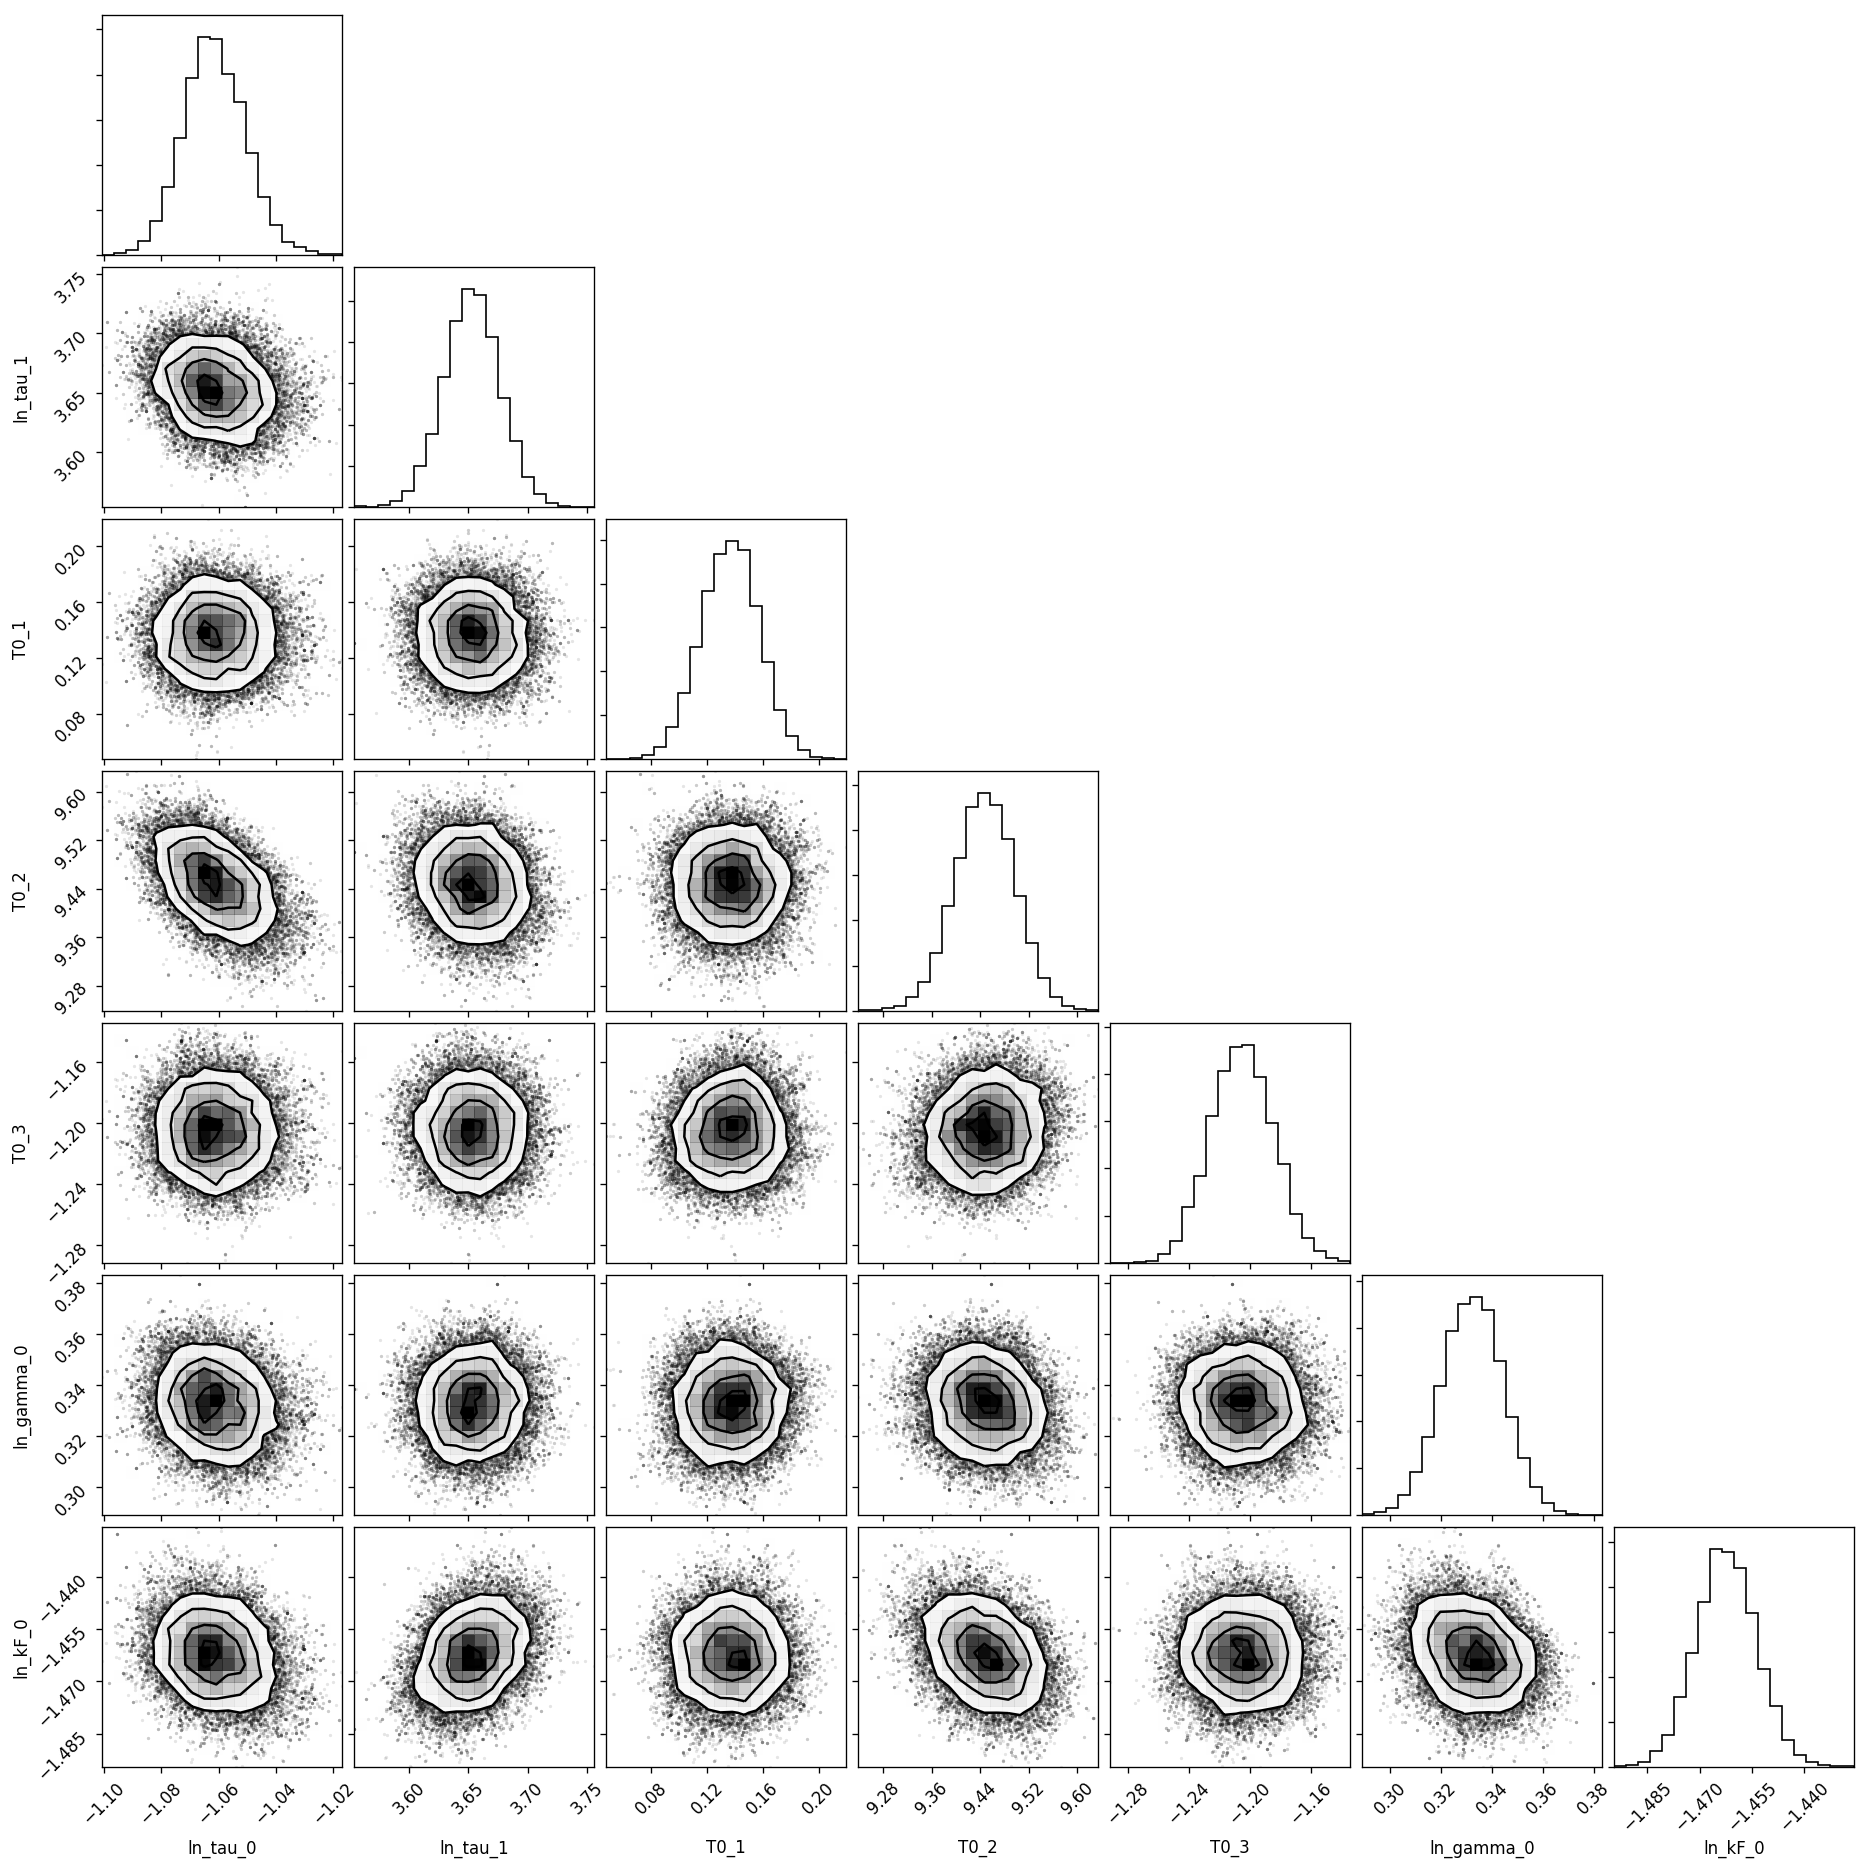

In [16]:
sampler.plot_corner(cube=False)

### Use likelihood object to make other useful plots

In [17]:
# get best fit model
ind = np.unravel_index(np.argmax(sampler.sampler.lnprobability, axis=None), sampler.sampler.lnprobability.shape)
best_fit=sampler.sampler.chain[ind]

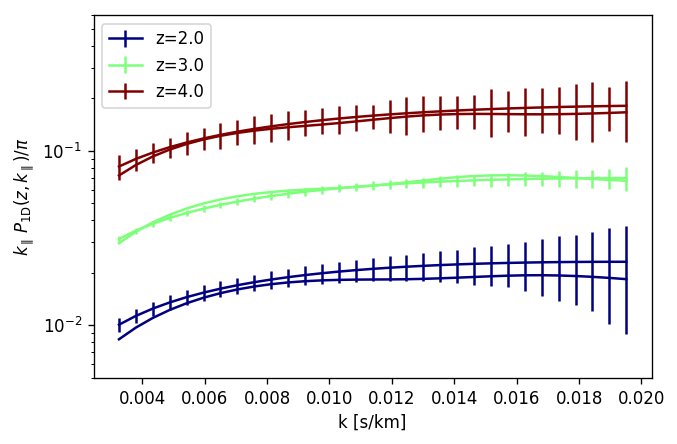

In [18]:
sampler.like.plot_p1d(values=best_fit,plot_every_iz=1)

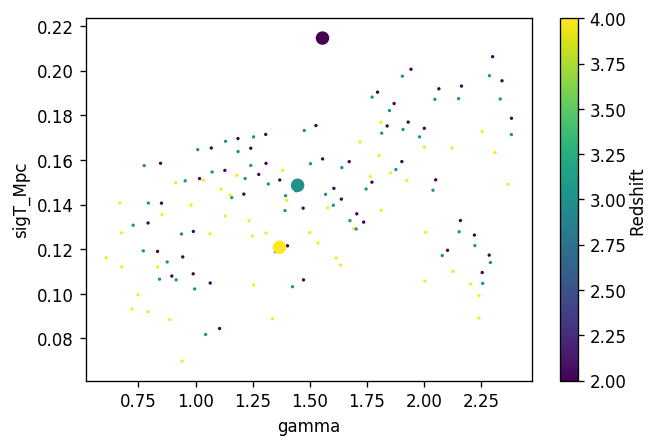

In [34]:
sampler.like.overplot_emulator_calls('gamma','sigT_Mpc',values=best_fit,tau_scalings=False, temp_scalings=False)

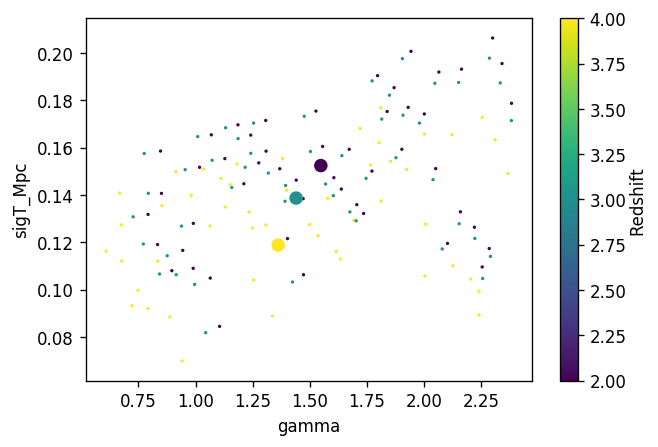

In [35]:
sampler.like.overplot_emulator_calls('gamma','sigT_Mpc',tau_scalings=False, temp_scalings=False)

In [33]:
help(sampler.like.overplot_emulator_calls)

Help on method overplot_emulator_calls in module likelihood:

overplot_emulator_calls(param_1, param_2, values=None, tau_scalings=True, temp_scalings=True) method of likelihood.Likelihood instance
    For parameter pair (param1,param2), overplot emulator calls
    with values stored in arxiv, color coded by redshift



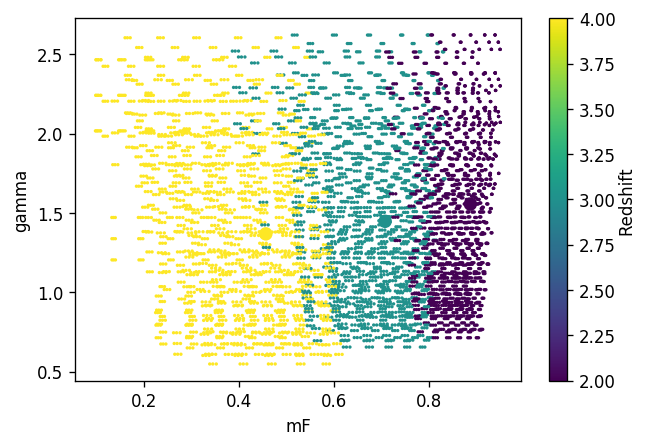

In [20]:
sampler.like.overplot_emulator_calls('mF','gamma',values=best_fit)

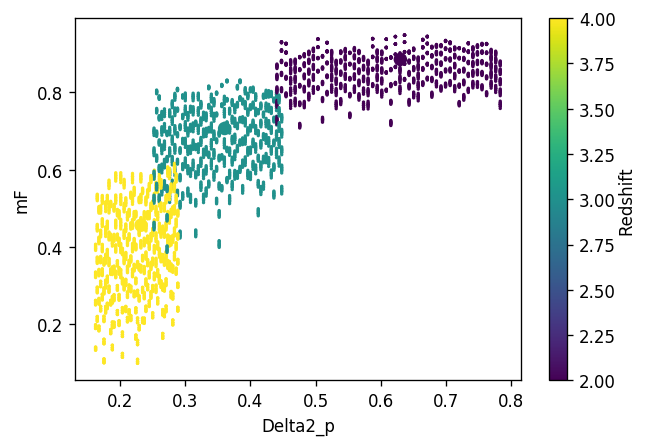

In [21]:
sampler.like.overplot_emulator_calls('Delta2_p','mF',values=best_fit)

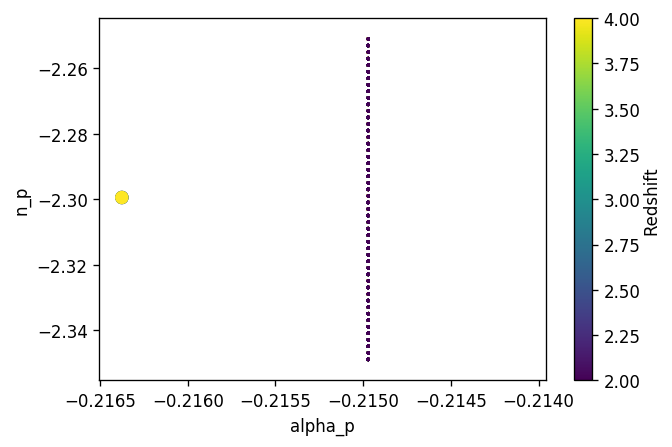

In [22]:
sampler.like.overplot_emulator_calls('alpha_p','n_p',values=best_fit)

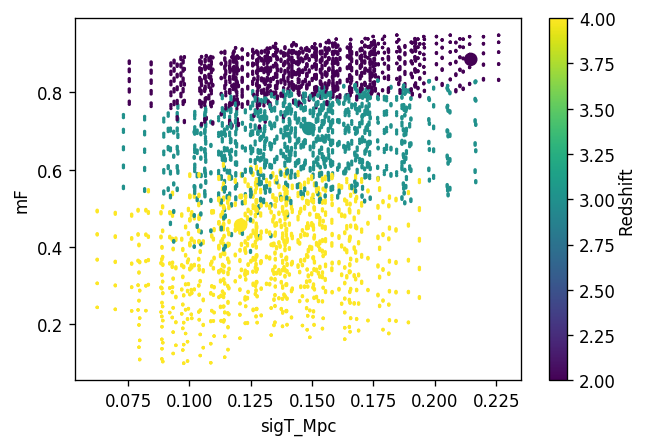

In [23]:
sampler.like.overplot_emulator_calls('sigT_Mpc','mF',values=best_fit)

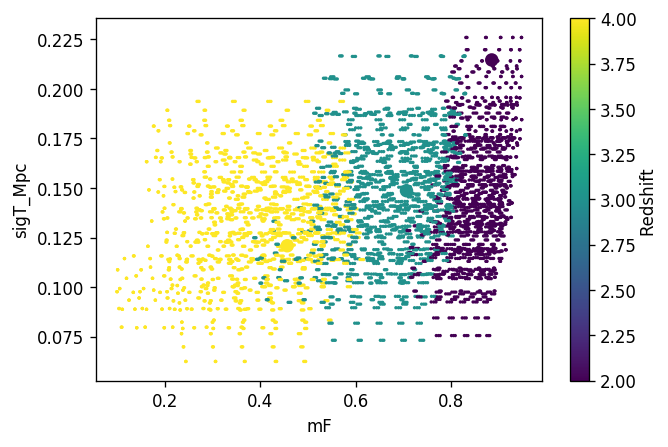

In [24]:
sampler.like.overplot_emulator_calls('mF','sigT_Mpc',values=best_fit)

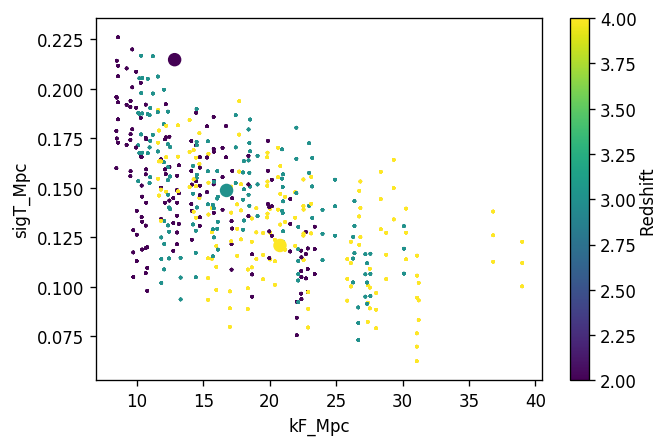

In [25]:
sampler.like.overplot_emulator_calls('kF_Mpc','sigT_Mpc',values=best_fit)

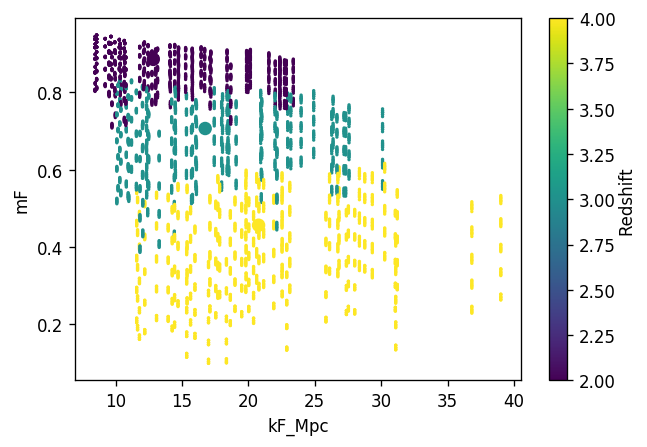

In [26]:
sampler.like.overplot_emulator_calls('kF_Mpc','mF',values=best_fit)

### Write chain to file for later use

In [27]:
chain_filename='test'
sampler.write_chain_to_file(chain_filename)

### Read pre-computed chain

In [28]:
new_sampler = emcee_sampler.EmceeSampler(emulator=emu,free_parameters=free_parameters,
                                         read_chain_file=chain_filename,verbose=True)

use default likelihood
Note: redshifts have been re-sorted (earliest first)
will read chain from file test
done setting up sampler


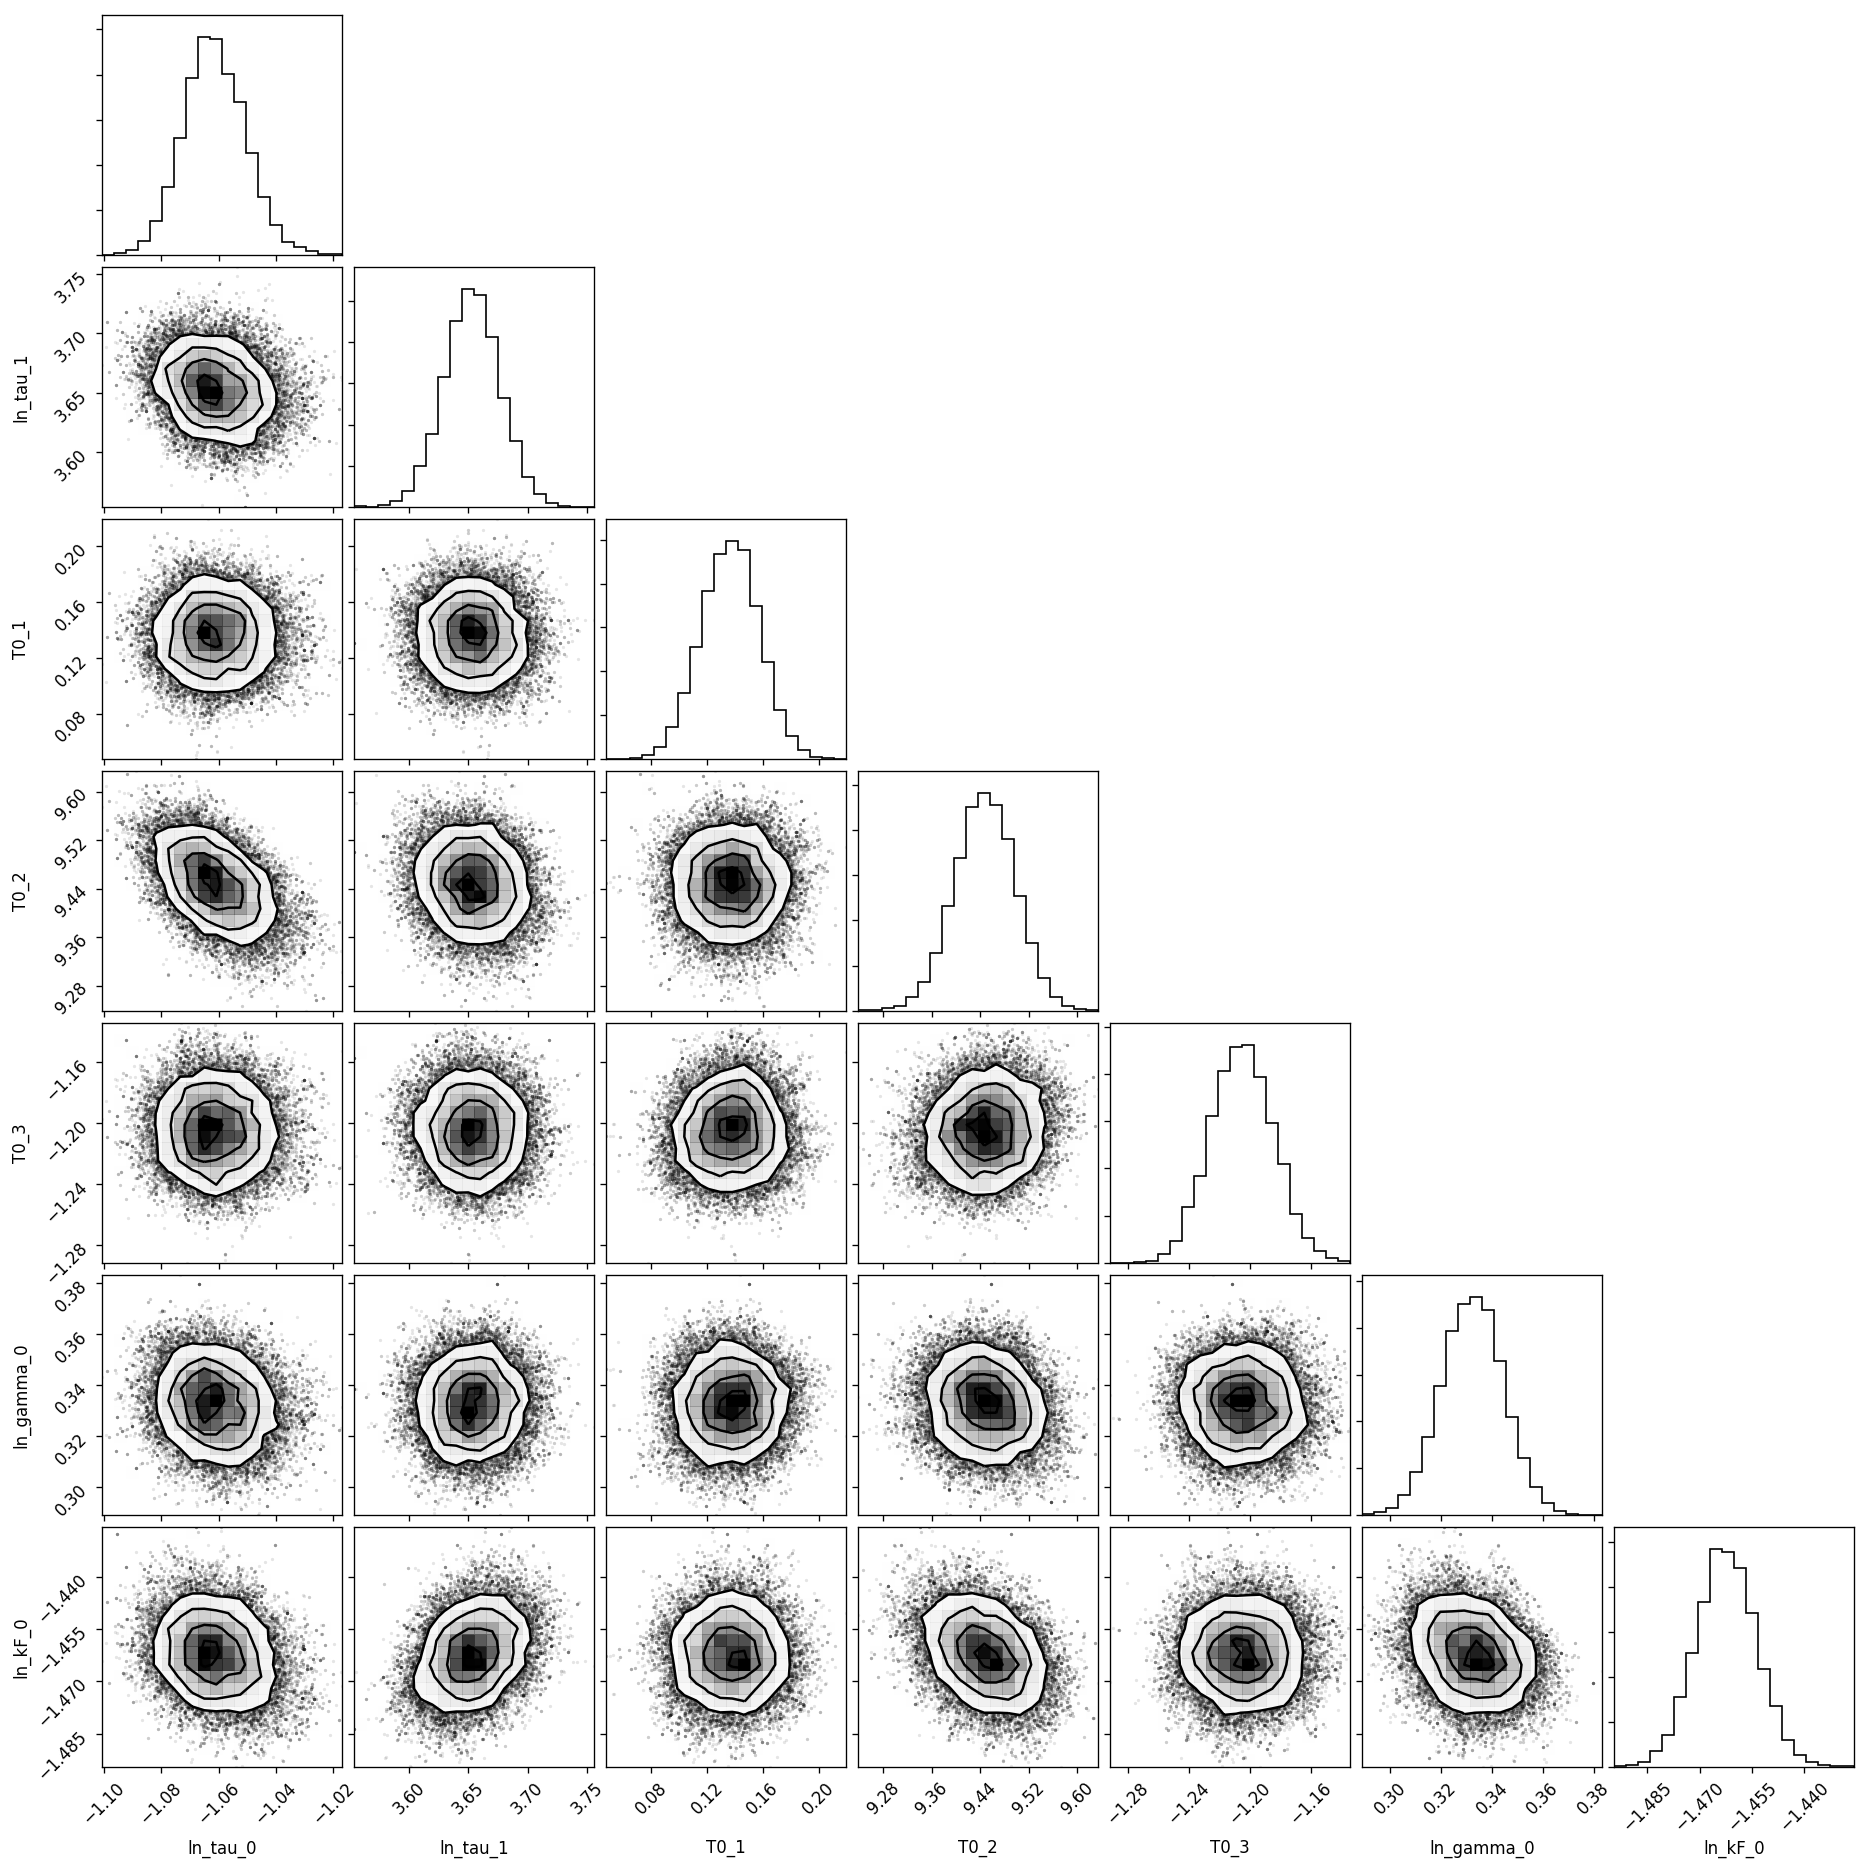

In [29]:
new_sampler.plot_corner(cube=False)

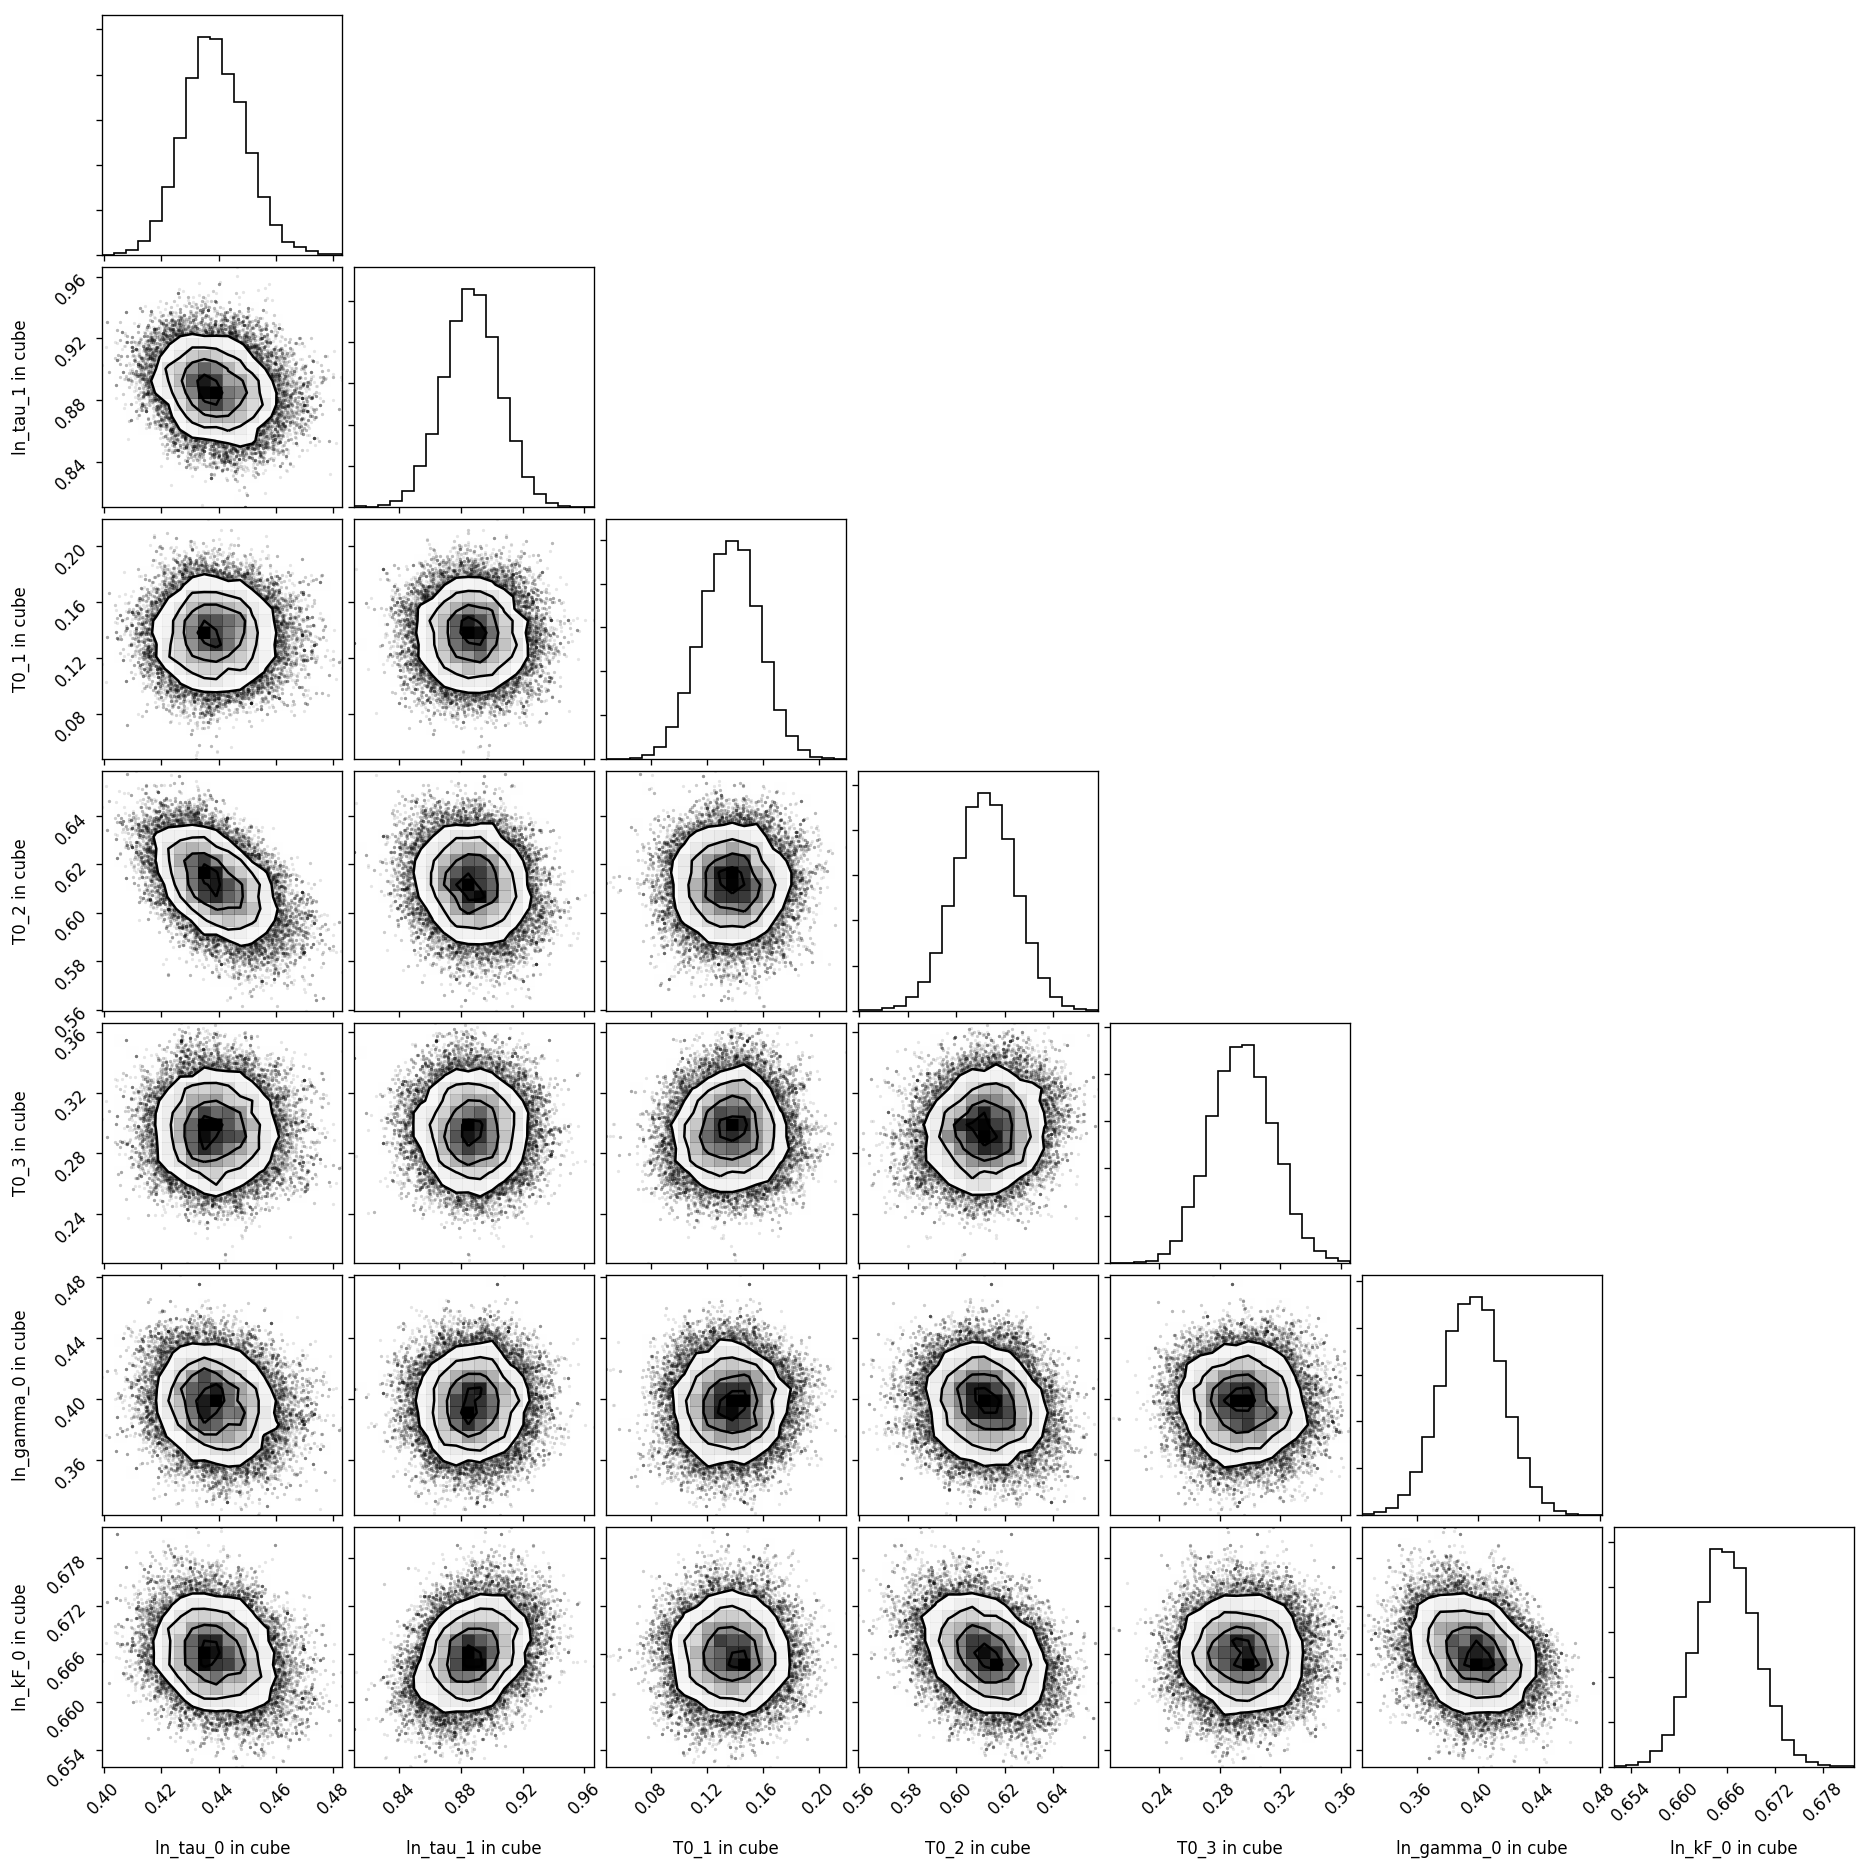

In [30]:
new_sampler.plot_corner(cube=True)

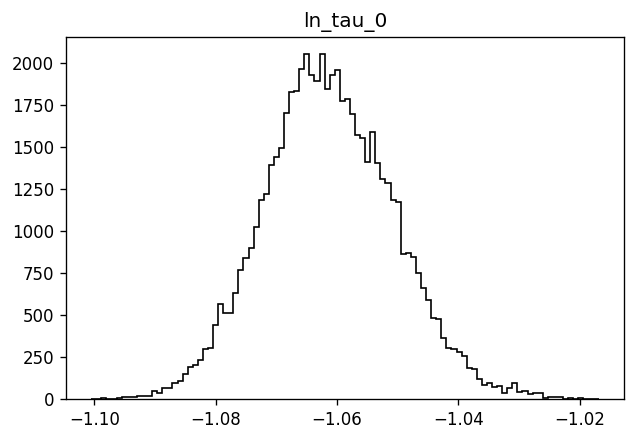

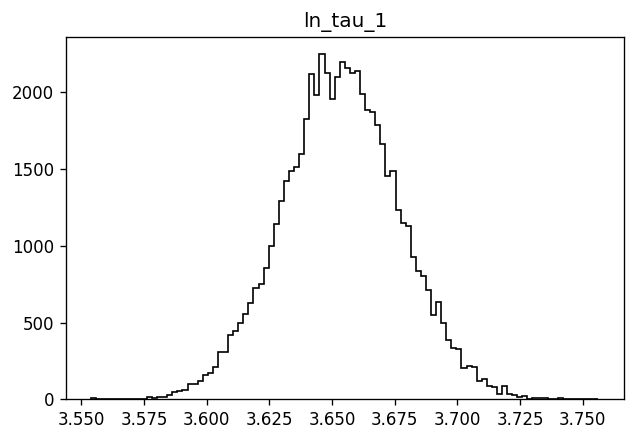

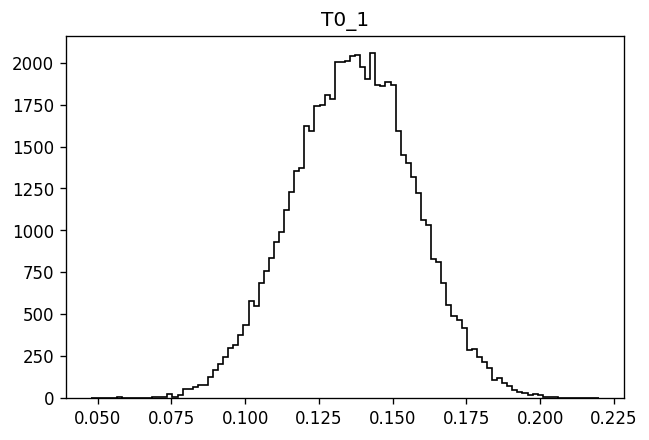

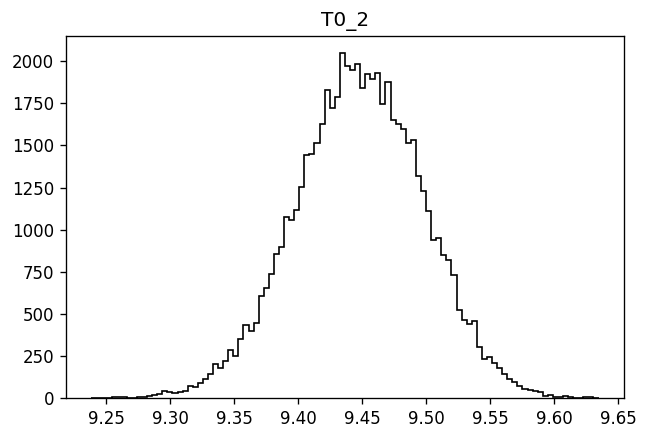

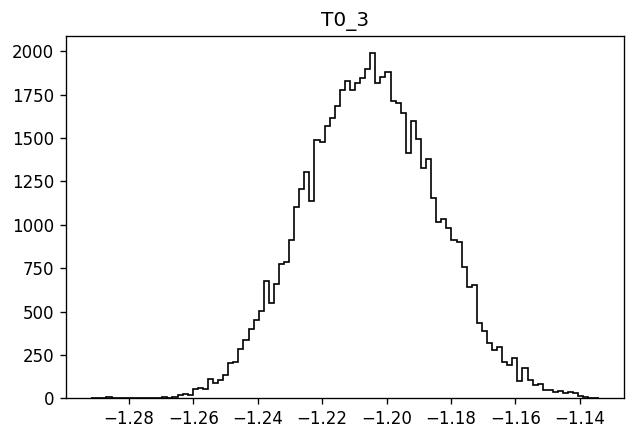

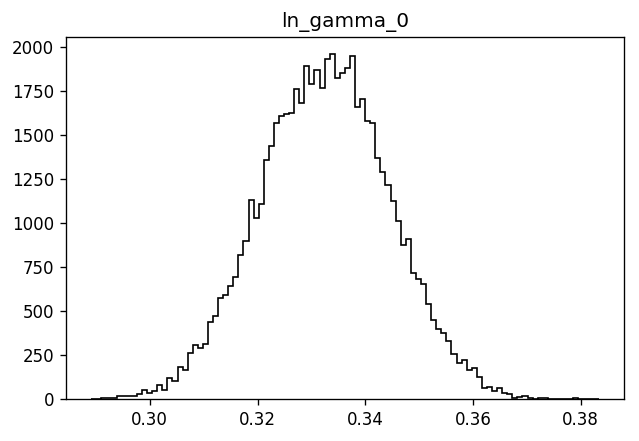

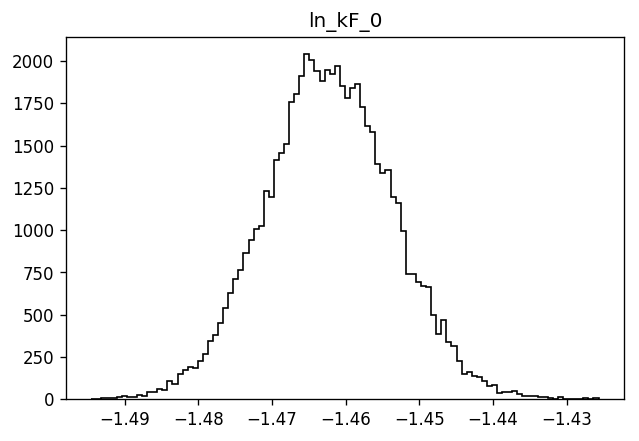

In [31]:
new_sampler.plot_histograms(cube=False)